# Project 2 - Ames Housing Data and Kaggle Challenge
## Revisited

When reviewing the various projects I completed during my time with General Assembly I found that Project 2, based on an existing Kaggle challenge, offered to most room for improvement. My notebooks were a mess: there was no clear organization to the repository as a whole and each individual notebook represented the full 'Data Science Process' (Cleaning through Model Deployment), each for a different list of features. 

While the project was not particularly complicated, the way in which I originally approached the project was: I now had a chance to improve upon the work I had done in a more succinct, cleaner manner. 

**Imports:**

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

**Reading in Data**

In [2]:
#reading in training and testing data
ames_df = pd.read_csv('../datasets/train_clean.csv')
ames_test_df = pd.read_csv('../datasets/test_clean.csv')

In [3]:
ames_df.shape, ames_test_df.shape

((2051, 79), (878, 78))

In [4]:
ames_df.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'gara

In [5]:
ames_df.isna().sum().sort_values(ascending = False)[0:28]

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_full_bath       2
bsmt_half_bath       2
garage_area          1
garage_cars          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
3ssn_porch           0
screen_porch         0
dtype: int64

In [6]:
ames_test_df.isna().sum().sort_values(ascending = False)[0:20]

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_2     25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmt_qual          25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
totrms_abvgrd       0
dtype: int64

**Filling Null Values**

In [7]:
ames_df['pool_qc'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: pool_qc, dtype: int64

In [8]:
ames_df['pool_qc'].fillna(value = 'NoPl', inplace = True)

#repeating for the testing data:
ames_test_df['pool_qc'].fillna(value = 'NoPl', inplace = True)

In [9]:
ames_df['misc_feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: misc_feature, dtype: int64

In [10]:
ames_df['misc_feature'].fillna(value = 'NoMisc', inplace = True)

#repeating for the testing data:
ames_test_df['misc_feature'].fillna(value = 'NoMisc', inplace = True)

In [11]:
ames_df['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [12]:
ames_df['alley'].fillna(value = 'NoAlley', inplace = True)

#repeating for the testing data:
ames_test_df['alley'].fillna(value = 'NoAlley', inplace = True)

In [13]:
ames_df['fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [14]:
ames_df['fence'].fillna(value = 'NoFnc', inplace = True)

#repeating for the testing data:
ames_test_df['fence'].fillna(value = 'NoFnc', inplace = True)

In [15]:
ames_df['fireplace_qu'].value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: fireplace_qu, dtype: int64

In [16]:
ames_df['fireplace_qu'].fillna(value = 'NoFrPl', inplace = True)

#repeating for the testing data:
ames_test_df['fireplace_qu'].fillna(value = 'NoFrPl', inplace = True)

In [17]:
#checking nulls for 'lot_frontage'
ames_df[ames_df['lot_frontage'].isna()].head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,NaN,13517,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NoFrPl,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NoPl,NoFnc,NoMisc,0,3,2010,WD,130500
7,20,RL,NaN,12160,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NoFrPl,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NoPl,MnPrv,NoMisc,0,5,2010,COD,142000
8,20,RL,NaN,15783,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NoFrPl,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NoPl,MnPrv,Shed,400,6,2007,WD,112500
23,20,RL,NaN,7980,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NoFrPl,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NoPl,GdPrv,Shed,500,3,2010,WD,185000
27,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NoPl,NoFnc,NoMisc,0,7,2008,WD,198000


- If Lot Frontage is null for a house one would assume the property is not adjacent to a road, however many of the homes above have garages. I am therefore going to replace the 'lot_frontage' nulls with the median value. 

In [18]:
ames_df['lot_frontage'].median(), ames_test_df['lot_frontage'].median()

(68.0, 68.0)

In [19]:
ames_df['lot_frontage'].fillna(value = ames_df['lot_frontage'].median(), inplace = True)

#repeating for the testing data:
ames_test_df['lot_frontage'].fillna(value = ames_test_df['lot_frontage'].median(), inplace = True)

In [20]:
ames_df['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64

In [21]:
ames_df['garage_finish'].fillna(value = 'NoGrg', inplace = True)

#repeating for the testing data:
ames_test_df['garage_finish'].fillna(value = 'NoGrg', inplace = True)

In [22]:
ames_df['garage_qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [23]:
ames_df['garage_qual'].fillna(value = 'NoGrg', inplace = True)

#repeating for the testing data:
ames_test_df['garage_qual'].fillna(value = 'NoGrg', inplace = True)

- If Garage Year Built is null for a house one would assume that there is no garage. I can't .fillna() with a value of 0, it doesn't make sense for what the value represents. I am going to replace the 'garage_yr_blt' nulls with the median value. 

In [24]:
ames_df['garage_yr_blt'].median(), ames_test_df['garage_yr_blt'].median()

(1980.0, 1978.0)

In [25]:
ames_df['garage_yr_blt'].fillna(value = ames_df['garage_yr_blt'].median(), inplace = True)

#repeating for the testing data:
ames_test_df['garage_yr_blt'].fillna(value = ames_test_df['garage_yr_blt'].median(), inplace = True)

In [26]:
ames_df['garage_cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [27]:
ames_df['garage_cond'].fillna(value = 'NoGrg', inplace = True)

#repeating for the testing data:
ames_test_df['garage_cond'].fillna(value = 'NoGrg', inplace = True)

In [28]:
ames_df['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [29]:
ames_df['garage_type'].fillna(value = 'NoGrg', inplace = True)

#repeating for the testing data:
ames_test_df['garage_type'].fillna(value = 'NoGrg', inplace = True)

In [30]:
ames_df['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [31]:
ames_df['bsmt_exposure'].fillna(value = 'No', inplace = True)

#repeating for the testing data:
ames_test_df['bsmt_exposure'].fillna(value = 'No', inplace = True)

In [32]:
ames_df['bsmtfin_type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [33]:
ames_df['bsmtfin_type_2'].fillna(value = 'NoBsmt', inplace = True)

#repeating for the testing data:
ames_test_df['bsmtfin_type_2'].fillna(value = 'NoBsmt', inplace = True)

In [34]:
ames_df['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [35]:
ames_df['bsmtfin_type_1'].fillna(value = 'NoBsmt', inplace = True)

#repeating for the testing data:
ames_test_df['bsmtfin_type_1'].fillna(value = 'NoBsmt', inplace = True)

In [36]:
ames_df['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [37]:
ames_df['bsmt_cond'].fillna(value = 'NoBsmt', inplace = True)

#repeating for the testing data:
ames_test_df['bsmt_cond'].fillna(value = 'NoBsmt', inplace = True)

In [38]:
ames_df['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [39]:
ames_df['bsmt_qual'].fillna(value = 'NoBsmt', inplace = True)

#repeating for the testing data:
ames_test_df['bsmt_qual'].fillna(value = 'NoBsmt', inplace = True)

In [40]:
ames_df['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [41]:
ames_df['mas_vnr_type'].fillna(value = 'None', inplace = True)

#repeating for the testing data:
ames_test_df['mas_vnr_type'].fillna(value = 'None', inplace = True)

In [42]:
#checking nulls for 'msn_vnr_area'
ames_df[ames_df['mas_vnr_area'].isna()][['mas_vnr_area', 'mas_vnr_type']].head()

#all instances where mas_vnr_type is null, mas_vnr_area is also null

,mas_vnr_area,mas_vnr_type
22,NaN,None
41,NaN,None
86,NaN,None
212,NaN,None
276,NaN,None


- If Masonry Veneer Area is null for a house one would assume that there is no exterior masonry. This is further confirmed by the fact that 'mas_vnr_type' is null for all instances where 'mas_vnr_area' is null. These null values can be filled with zero.

In [43]:
#the median value of 'mas_vnr_area' also happens to be zero
ames_df['mas_vnr_area'].median()

0.0

In [44]:
ames_df['mas_vnr_area'].fillna(0, inplace = True)

#repeating for the testing data:
ames_test_df['mas_vnr_area'].fillna(0, inplace = True)

In [45]:
#I know one of the two 'bsmt_full_bath' null values will belong to index 1327, a house with no basement
ames_df[ames_df['bsmt_full_bath'].isna()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,20,RL,123.0,47007,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NoBsmt,NoBsmt,No,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NoPl,NoFnc,NoMisc,0,7,2008,WD,284700
1327,20,RM,99.0,5940,Pave,NoAlley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NoBsmt,NoBsmt,No,NoBsmt,NaN,NoBsmt,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NoFrPl,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NoPl,MnPrv,NoMisc,0,4,2008,ConLD,79000


In [46]:
#observing the data, the house represented by index 616 also doesn't have a basement, 
#filling 'bsmt_full_bath' null values with 0s.
ames_df['bsmt_full_bath'].fillna(0, inplace = True)

#repeating for the testing data:
ames_test_df['bsmt_full_bath'].fillna(0, inplace = True)

In [47]:
ames_df[ames_df['bsmt_half_bath'].isna()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,20,RL,123.0,47007,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NoBsmt,NoBsmt,No,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NoPl,NoFnc,NoMisc,0,7,2008,WD,284700
1327,20,RM,99.0,5940,Pave,NoAlley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NoBsmt,NoBsmt,No,NoBsmt,NaN,NoBsmt,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,TA,4,Typ,0,NoFrPl,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NoPl,MnPrv,NoMisc,0,4,2008,ConLD,79000


In [48]:
#filling 'bsmt_half_bath' null values with 0s.
ames_df['bsmt_half_bath'].fillna(0, inplace = True)

#repeating for the testing data:
ames_test_df['bsmt_half_bath'].fillna(0, inplace = True)

In [49]:
#checking nulls for garage qualities
ames_df[ames_df['garage_area'].isna()][['garage_yr_blt', 'garage_cars', 'garage_area']].head()

#the data indicates the house has no garage, I can fill garage_cars and garage_area with 0

,garage_yr_blt,garage_cars,garage_area
1712,1980.0,NaN,NaN


- There appears to be one house with a garage that cannot fit a vehicle (maybe it's dilapidated?)

In [50]:
ames_df['garage_area'].fillna(0, inplace = True)
ames_df['garage_cars'].fillna(0, inplace = True)

In [51]:
#repeating for the testing data:
ames_test_df['garage_area'].fillna(0, inplace = True)
ames_test_df['garage_cars'].fillna(0, inplace = True)

In [52]:
ames_df[ames_df['total_bsmt_sf'].isna()][['bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
                                         'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2',
                                         'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_unf_sf']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_unf_sf
1327,NoBsmt,NoBsmt,No,NoBsmt,NaN,NoBsmt,NaN,NaN,NaN,NaN


In [53]:
ames_df['total_bsmt_sf'].fillna(0, inplace = True)

#repeating for the testing data:
ames_test_df['total_bsmt_sf'].fillna(0, inplace = True)

In [54]:
ames_df['bsmtfin_sf_2'].fillna(0, inplace = True)

#repeating for the testing data:
ames_test_df['bsmtfin_sf_2'].fillna(0, inplace = True)

In [55]:
ames_df['bsmtfin_sf_1'].fillna(0, inplace = True)

#repeating for the testing data:
ames_test_df['bsmtfin_sf_1'].fillna(0, inplace = True)

In [56]:
ames_df['bsmt_unf_sf'].fillna(0, inplace = True)

#repeating for the testing data:
ames_test_df['bsmt_unf_sf'].fillna(0, inplace = True)

In [57]:
ames_df.isna().sum().sort_values(ascending = False)[0:28]

ms_subclass        0
bedroom_abvgr      0
garage_type        0
fireplace_qu       0
fireplaces         0
functional         0
totrms_abvgrd      0
kitchen_qual       0
kitchen_abvgr      0
half_bath          0
garage_finish      0
full_bath          0
bsmt_half_bath     0
bsmt_full_bath     0
gr_liv_area        0
low_qual_fin_sf    0
2nd_flr_sf         0
1st_flr_sf         0
garage_yr_blt      0
garage_cars        0
central_air        0
pool_area          0
sale_type          0
yr_sold            0
mo_sold            0
misc_val           0
misc_feature       0
fence              0
dtype: int64

In [58]:
ames_test_df.isna().sum().sort_values(ascending = False)

electrical      1
ms_subclass     0
half_bath       0
fireplace_qu    0
fireplaces      0
               ..
mas_vnr_area    0
mas_vnr_type    0
exterior_2nd    0
exterior_1st    0
sale_type       0
Length: 78, dtype: int64

In [59]:
ames_df['electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [60]:
ames_test_df['electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [61]:
ames_test_df[ames_test_df['electrical'].isna()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
634,80,RL,73.0,9735,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NoFrPl,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NoPl,NoFnc,NoMisc,0,5,2008,WD


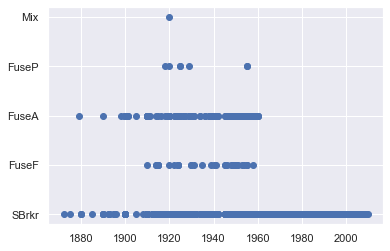

In [62]:
plt.scatter(x = 'year_built', y = 'electrical', data = ames_df);

In [63]:
ames_test_df['electrical'].fillna(value = 'SBrkr', inplace = True)

- As we observe in the above plot, all homes built after 1980 have an 'electrical' feature with a value 'SBrkr'. There is no deviation. I am going to .fillna() with the value SBrkr for the one remaining null in ames_test_df.

**Addressing Objects**

In [64]:
list_feats_obj = ames_df.select_dtypes(exclude = 'number').columns
list_feats_obj

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

In [65]:
ames_df[list_feats_obj]

,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,RL,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NoFrPl,Attchd,RFn,TA,TA,Y,NoPl,NoFnc,NoMisc,WD
1,RL,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NoPl,NoFnc,NoMisc,WD
2,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NoFrPl,Detchd,Unf,TA,TA,Y,NoPl,NoFnc,NoMisc,WD
3,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NoFrPl,BuiltIn,Fin,TA,TA,Y,NoPl,NoFnc,NoMisc,WD
4,RL,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NoFrPl,Detchd,Unf,TA,TA,N,NoPl,NoFnc,NoMisc,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,NoAlley,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NoPl,NoFnc,NoMisc,WD
2047,RL,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NoFrPl,Detchd,Unf,TA,TA,Y,NoPl,NoFnc,NoMisc,WD
2048,RL,Pave,NoAlley,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Detchd,Unf,Fa,Fa,Y,NoPl,NoFnc,NoMisc,WD
2049,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,NoPl,NoFnc,NoMisc,WD


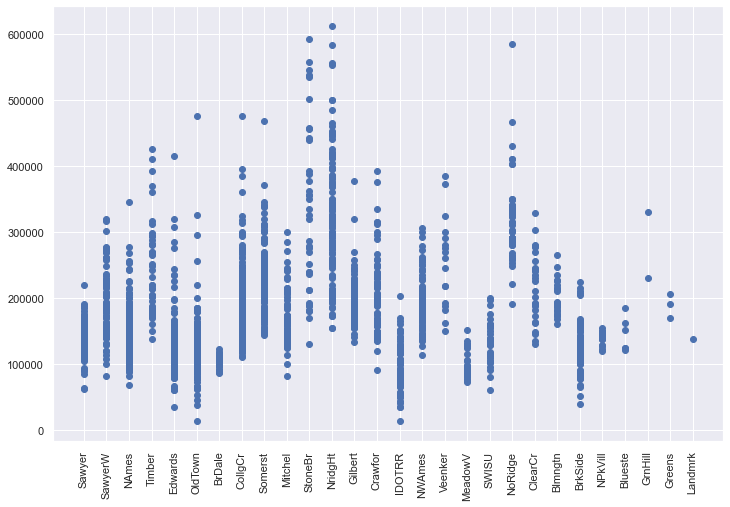

In [66]:
#for all the categorical values it's relatively easy to assign a number value to a quality,
#with the exception of 'neighborhood'. I'm going to assign number values to the 'neighborhood'
#column based on the lowest house price in the neighborhood (visually)

plt.figure(figsize = (12,8))
plt.scatter(x = 'neighborhood',
            y = 'saleprice',
            data = ames_df)

plt.xticks(rotation = 90);

#Sawyer, SawyerW, NAmes, Edwards,
#OldTown, BrDale, Mitchel, Crawfor,
#IDOTRR, MeadowV, SWISU, and BrkSide are going to be assigned 0

#Timber, CollgCr, Somerst, StoneBr,
#Gilbert, NWAmes, Veenker, ClearCr,
#Blmngtn, NPkVill, Blueste, Greens, and Landmrk are going to be assigned 1

#NoRidge, GrnHill are going to be assigned 2

In [67]:
#https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans
ms_zoning_dict = {'RL': 3,
                  'RM': 2,
                  'FV': 2,
                  'C (all)': 1,
                  'RH': 1,
                  'A (agr)': 0,
                  'I (all)': 0}

street_dict = {'Pave': 1,
               'Grvl': 0}

alley_dict = {'NoAlley': 1,
              'Grvl': 0,
              'Pave': 0}

lot_shape_dict = {'Reg': 2,
                  'IR1': 1,
                  'IR2': 0,
                  'IR3': 0}

land_contour_dict = {'Lvl': 1,
                     'HLS': 0,
                     'Bnk': 0,
                     'Low': 0}

utilities_dict = {'AllPub': 1,
                  'NoSewr': 0,
                  'NoSeWa': 0}

lot_config_dict = {'Inside': 2,
                   'Corner': 1,
                   'CulDSac': 1,
                   'FR2': 0,
                   'FR3': 0}

land_slope_dict = {'Gtl': 1,
                   'Mod': 0,
                   'Sev': 0}

neighborhood_dict = {'Sawyer': 0,
                     'SawyerW': 0,
                     'NAmes': 0,
                     'Edwards': 0,
                     'OldTown': 0, 
                     'BrDale': 0, 
                     'Mitchel': 0, 
                     'Crawfor': 0,
                     'IDOTRR': 0, 
                     'MeadowV': 0, 
                     'SWISU': 0, 
                     'BrkSide': 0,
                     'Timber': 1, 
                     'CollgCr': 1, 
                     'Somerst': 1, 
                     'StoneBr': 1, 
                     'Gilbert': 1, 
                     'NWAmes': 1, 
                     'Veenker': 1, 
                     'ClearCr': 1, 
                     'Blmngtn': 1, 
                     'NPkVill': 1, 
                     'Blueste': 1, 
                     'Greens': 1, 
                     'Landmrk': 1, 
                     'NoRidge': 2,
                     'GrnHill': 2}

condition_1_dict = {'Norm': 1,
                    'Feedr': 0,
                    'Artery': 0,
                    'RRAn': 0,
                    'PosN': 0,
                    'RRAe': 0,
                    'PosA': 0,
                    'RRNn': 0,
                    'RRNe': 0}

condition_2_dict = {'Norm': 1,
                    'Feedr': 0,
                    'Artery': 0,
                    'RRAn': 0,
                    'PosN': 0,
                    'RRAe': 0,
                    'PosA': 0,
                    'RRNn': 0,
                    'RRNe': 0}

bldg_type_dict = {'1Fam': 1,
                  'TwnhsE': 1,
                  'Duplex': 0,
                  'Twnhs': 0,
                  '2fmCon': 0}

house_style_dict = {'1Story': 2,
                    '2Story': 2,
                    '1.5Fin': 1,
                    'SLvl': 0,
                    'SFoyer': 0,
                    '2.5Unf': 0,
                    '1.5Unf': 0,
                    '2.5Fin': 0}

roof_style_dict = {'Gable': 2,
                   'Hip': 1,
                   'Flat': 0,
                   'Gambrel': 0,
                   'Mansard': 0,
                   'Shed': 0}

roof_matl_dict = {'CompShg': 1,
                  'Tar&Grv': 0,
                  'WdShngl': 0,
                  'WdShake': 0,
                  'ClyTile': 0,
                  'Membran': 0}

exterior_1st_dict = {'VinylSd': 3,
                     'MetalSd': 2,
                     'HdBoard': 2,
                     'Wd Sdng': 1,
                     'Plywood': 1,
                     'CemntBd': 0,
                     'BrkFace': 0,
                     'WdShing': 0,
                     'AsbShng': 0,
                     'Stucco': 0,
                     'BrkComm': 0,
                     'Stone': 0,
                     'CBlock': 0,
                     'ImStucc': 0,
                     'AsphShn': 0}

exterior_2nd_dict = {'VinylSd': 3,
                     'MetalSd': 2,
                     'HdBoard': 2,
                     'Wd Sdng': 1,
                     'Plywood': 1,
                     'CemntBd': 0,
                     'BrkFace': 0,
                     'WdShing': 0,
                     'AsbShng': 0,
                     'Stucco': 0,
                     'BrkComm': 0,
                     'Stone': 0,
                     'CBlock': 0,
                     'ImStucc': 0,
                     'AsphShn': 0}

mas_vnr_type_dict = {'None': 2,
                     'BrkFace': 1,
                     'Stone': 0,
                     'BrkCmn': 0}

exter_qual_dict = {'Ex': 5,
                   'Gd': 4,
                   'TA': 3,
                   'Fa': 2,
                   'Po': 1,
                   0: 0}

exter_cond_dict = {'Ex': 5,
                   'Gd': 4,
                   'TA': 3,
                   'Fa': 2,
                   'Po': 1,
                   0: 0}

foundation_dict = {'PConc': 2,
                   'CBlock': 2,
                   'BrkTil': 1,
                   'Slab': 0,
                   'Stone': 0,
                   'Wood': 0}

bsmt_qual_dict = {'Ex': 5,
                  'Gd': 4,
                  'TA': 3,
                  'Fa': 2,
                  'Po': 1,
                  'NoBsmt': 0}

bsmt_cond_dict = {'Ex': 5,
                  'Gd': 4,
                  'TA': 3,
                  'Fa': 2,
                  'Po': 1,
                  'NoBsmt': 0}

bsmt_exposure_dict = {'Gd': 4,
                      'Av': 3,
                      'Mn': 2,
                      'No': 1,
                      'NoBsmt': 0}

bsmtfin_type_1_dict = {'GLQ': 6,
                       'ALQ': 5,
                       'BLQ': 4,
                       'Rec': 3,
                       'LwQ': 2,
                       'Unf': 1,
                       'NoBsmt': 0}

bsmtfin_type_2_dict = {'GLQ': 6,
                       'ALQ': 5,
                       'BLQ': 4,
                       'Rec': 3,
                       'LwQ': 2,
                       'Unf': 1,
                       'NoBsmt': 0}

heating_dict = {'GasA': 1,
                'GasW': 0,
                'Wall': 0,
                'Grav': 0,
                'OthW': 0}

heating_qc_dict = {'Ex': 5,
                   'Gd': 4,
                   'TA': 3,
                   'Fa': 2,
                   'Po': 1}

central_air_dict = {'Y': 1,
                    'N': 0}

electrical_dict = {'SBrkr': 2,
                    'FuseA': 1,
                    'FuseF': 0,
                    'FuseP': 0,
                    'Mix': 0}

kitchen_qual_dict = {'Ex': 5,
                     'Gd': 4,
                     'TA': 3,
                     'Fa': 2,
                     'Po': 1}

functional_dict = {'Typ': 2,
                     'Min1': 1,
                     'Min2': 1,
                     'Mod': 1,
                     'Maj1': 0,
                     'Maj2': 0,
                     'Sal': 0,
                     'Sav': 0}

fireplace_qu_dict = {'Ex': 5,
                     'Gd': 4,
                     'TA': 3,
                     'Fa': 2,
                     'Po': 1,
                     'NoFrPl': 0}

garage_type_dict = {'2Types': 6,
                    'Attchd': 5,
                    'Basment': 4,
                    'BuiltIn': 3,
                    'CarPort': 2,
                    'Detchd': 1,
                    'NoGrg': 0}
        
garage_finish_dict = {'Fin': 3,
                    'RFn': 2,
                    'Unf': 1,
                    'NoGrg': 0}

garage_qual_dict = {'Ex': 5,
                     'Gd': 4,
                     'TA': 3,
                     'Fa': 2,
                     'Po': 1,
                     'NoGrg': 0}

garage_cond_dict = {'Ex': 5,
                    'Gd': 4,
                    'TA': 3,
                    'Fa': 2,
                    'Po': 1,
                    'NoGrg': 0}

paved_drive_dict = {'Y': 2,
                    'P': 1,
                    'N': 0}

pool_qc_dict = {'Ex': 5,
                'Gd': 4,
                'TA': 3,
                'Fa': 2,
                'Po': 1,
                'NoPl': 0}

fence_dict = {'GdPrv': 4,
              'MnPrv': 3,
              'GdWo': 2,
              'MNWw': 1,
              'NoFnc': 0}

misc_feature_dict = {'Elev': 1,
                     'Gar2': 1,
                     'Othr': 1,
                     'Shed': 1,
                     'TenC': 1,
                     'NoMisc': 0}

sale_type_dict = {'WD': 1,
                  'New': 0,
                  'COD': 0,
                  'ConLD': 0,
                  'CWD': 0,
                  'ConLI': 0,
                  'ConLw': 0,
                  'Con': 0,
                  'Oth': 0}

In [68]:
list_feats_obj

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

In [69]:
ames_df.replace({'ms_zoning': ms_zoning_dict, 
                 'street': street_dict,
                 'alley': alley_dict, 
                 'lot_shape': lot_shape_dict,
                 'land_contour': land_contour_dict, 
                 'utilities': utilities_dict,
                 'lot_config': lot_config_dict, 
                 'land_slope': land_slope_dict,
                 'neighborhood': neighborhood_dict, 
                 'condition_1': condition_1_dict,
                 'condition_2': condition_2_dict, 
                 'bldg_type': bldg_type_dict,
                 'house_style': house_style_dict, 
                 'roof_style': roof_style_dict,
                 'roof_matl': roof_matl_dict, 
                 'exterior_1st': exterior_1st_dict,
                 'exterior_2nd': exterior_2nd_dict, 
                 'mas_vnr_type': mas_vnr_type_dict,
                 'exter_qual': exter_qual_dict, 
                 'exter_cond': exter_cond_dict,
                 'foundation': foundation_dict, 
                 'bsmt_qual': bsmt_qual_dict,
                 'bsmt_cond': bsmt_cond_dict,
                 'bsmt_exposure': bsmt_exposure_dict, 
                 'bsmtfin_type_1': bsmtfin_type_1_dict,
                 'bsmtfin_type_2': bsmtfin_type_2_dict, 
                 'heating': heating_dict,
                 'heating_qc': heating_qc_dict,
                 'central_air': central_air_dict,
                 'electrical': electrical_dict, 
                 'kitchen_qual': kitchen_qual_dict,
                 'functional': functional_dict, 
                 'fireplace_qu': fireplace_qu_dict,
                 'garage_type': garage_type_dict, 
                 'garage_finish': garage_finish_dict,
                 'garage_qual': garage_qual_dict,
                 'garage_cond': garage_cond_dict,
                 'paved_drive': paved_drive_dict, 
                 'pool_qc': pool_qc_dict,
                 'fence': fence_dict, 
                 'misc_feature': misc_feature_dict,
                 'sale_type': sale_type_dict}, 
                 inplace = True)

In [70]:
ames_df

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,3,68.0,13517,1,1,1,1,1,1,1,0,0,1,1,2,6,8,1976,2005,2,1,2,1,1,289.0,4,3,2,3,3,1,6,533.0,1,0.0,192.0,725.0,1,5,1,2,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,2,0,0,5,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500
1,60,3,43.0,11492,1,1,1,1,1,1,1,0,1,1,1,2,7,5,1996,1997,2,1,3,3,1,132.0,4,3,2,4,3,1,6,637.0,1,0.0,276.0,913.0,1,5,1,2,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,2,1,3,5,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000
2,20,3,68.0,7922,1,1,2,1,1,2,1,0,1,1,1,2,5,7,1953,2007,2,1,3,3,2,0.0,3,4,2,3,3,1,6,731.0,1,0.0,326.0,1057.0,1,3,1,2,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,2,0,0,1,1953.0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000
3,60,3,73.0,9802,1,1,2,1,1,2,1,1,1,1,1,2,5,5,2006,2007,2,1,3,3,2,0.0,3,3,2,4,3,1,1,0.0,1,0.0,384.0,384.0,1,4,1,2,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,2,0,0,3,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,0,0,0,4,2010,WD,174000
4,50,3,82.0,14235,1,1,1,1,1,2,1,0,1,1,1,1,6,8,1900,1993,2,1,1,1,2,0.0,3,3,2,2,4,1,1,0.0,1,0.0,676.0,676.0,1,3,1,2,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,2,0,0,1,1957.0,1,2.0,484.0,3,3,0,0,59,0,0,0,0,0,0,0,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,3,79.0,11449,1,1,1,0,1,2,1,1,1,1,1,2,8,5,2007,2007,2,1,3,3,2,0.0,4,3,2,4,3,3,6,1011.0,1,0.0,873.0,1884.0,1,5,1,2,1728,0,0,1728,1.0,0.0,2,0,3,1,4,7,2,1,4,5,2007.0,3,2.0,520.0,3,3,2,0,276,0,0,0,0,0,0,0,0,1,2008,WD,298751
2047,30,3,68.0,12342,1,1,1,1,1,2,1,0,1,1,1,2,4,5,1940,1950,2,1,3,3,2,0.0,3,3,2,3,3,1,4,262.0,1,0.0,599.0,861.0,1,5,1,2,861,0,0,861,0.0,0.0,1,0,1,1,3,4,2,0,0,1,1961.0,1,2.0,539.0,3,3,2,158,0,0,0,0,0,0,0,0,0,3,2009,WD,82500
2048,50,3,57.0,7558,1,1,2,0,1,2,1,0,1,1,1,1,6,6,1928,1950,2,1,0,0,2,0.0,3,3,1,3,3,1,1,0.0,1,0.0,896.0,896.0,1,4,1,2,1172,741,0,1913,0.0,0.0,1,1,3,1,3,9,2,1,3,1,1929.0,1,2.0,342.0,2,2,2,0,0,0,0,0,0,0,0,0,0,3,2009,WD,177000
2049,20,3,80.0,10400,1,1,2,1,1,1,1,0,1,1,1,2,4,5,1956,1956,2,1,1,1,2,0.0,3,3,2,3,3,1,3,155.0,2,750.0,295.0,1200.0,1,3,1,2,1200,0,0,1200,1.0,0.0,1,0,3,1,3,6,2,2,4,5,1956.0,1,1.0,294.0,3,3,2,0,189,140,0,0,0,0,0,0,0,11,2009,WD,144000


**Saving to .csv Files**

In [71]:
ames_df.to_csv('../datasets/train_model_ready.csv',
               index = False)

In [72]:
ames_test_df.to_csv('../datasets/test_model_ready.csv',
                    index = False)